# Example usage of NRHybSur3dq8 surrogate model.

In [1]:
import numpy as np
import matplotlib.pyplot as P
%matplotlib inline

import gwsurrogate

cannot import LAL
setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


## Download surrogate data, this only needs to be done once

In [2]:
# This can take a few minutes
gwsurrogate.catalog.pull('NRHybSur3dq8')

'/Users/vijay/src/gwsurrogate/gwsurrogate/surrogate_downloadsNRHybSur3dq8.h5'

## Load the surrogate, this only needs to be done once at the start of a script

In [2]:
sur = gwsurrogate.LoadSurrogate('NRHybSur3dq8')

Loaded NRHybSur3dq8 model


## Read the documentation

In [4]:
help(sur)

Help on NRHybSur3dq8 in module gwsurrogate.surrogate object:

class NRHybSur3dq8(SurrogateEvaluator)
 |  NRHybSur3dq8(h5filename)
 |  
 |  A class for the NRHybSur3dq8 surrogate model presented in Varma et al. 2018,
 |  arxiv:1812.07865.
 |  
 |  Evaluates gravitational waveforms generated by aligned-spin binary black hole
 |  systems. This model was built using numerical relativity (NR) waveforms that
 |  have been hybridized using post-Newtonian (PN) and effective one body (EOB)
 |  waveforms.
 |  
 |  This model includes the following spin-weighted spherical harmonic modes:
 |  (2,2), (2,1), (2,0), (3,3), (3,2), (3,1), (3,0), (4,4) (4,3), (4,2) and (5,5).
 |  The m<0 modes are deduced from the m>0 modes.
 |  
 |  The parameter space of validity is:
 |  q \in [1, 10] and chi1z/chi2z \in [-1, 1],
 |  where q is the mass ratio and chi1z/chi2z are the spins of the heavier/lighter
 |  BH, respectively, in the direction of orbital angular momentum.
 |  
 |  The surrogate has been trained 

## Evaluate the waveform

### Evaluate waveform modes in dimensionless units (default)

In [3]:
q = 7
chiA = [0, 0, 0.5]
chiB = [0, 0, -0.7]
dt = 0.1        # step size, Units of M
f_low = 5e-3    # initial frequency, Units of cycles/M
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low)        # dyn stands for dynamics and is always None for this model

In [4]:
# Let's see all available modes (m<0 modes will be included automatically if inclination arguments are given)
print( sorted(h.keys()) )

[(2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4), (5, 5)]


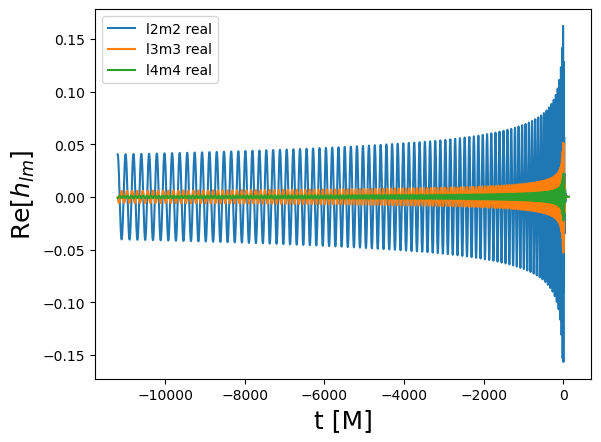

In [5]:
P.plot(t, h[(2,2)].real, label='l2m2 real')
P.plot(t, h[(3,3)].real, label='l3m3 real')
P.plot(t, h[(4,4)].real, label='l4m4 real')
P.ylabel('Re[$h_{lm}$]', fontsize=18)
P.xlabel('t [M]', fontsize=18)
P.legend()

In [7]:
# generate m<0 modes by setting ellMax
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, ellMax=5)
print( sorted(h.keys()) )

[(2, -2), (2, -1), (2, 0), (2, 1), (2, 2), (3, -3), (3, -2), (3, -1), (3, 0), (3, 1), (3, 2), (3, 3), (4, -4), (4, -3), (4, -2), (4, 2), (4, 3), (4, 4), (5, -5), (5, 5)]


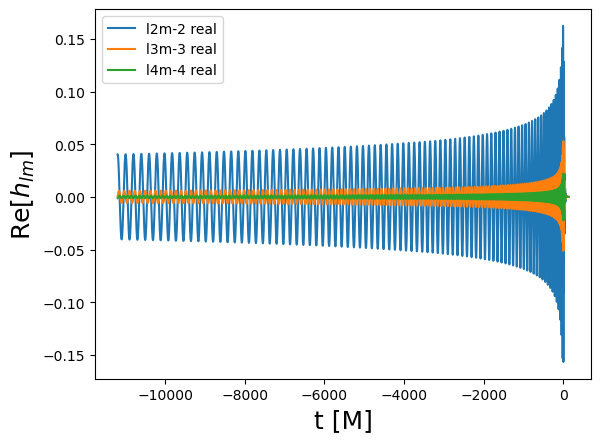

In [9]:
P.plot(t, h[(2,-2)].real, label='l2m-2 real')
P.plot(t, h[(3,-3)].real, label='l3m-3 real')
P.plot(t, h[(4,-4)].real, label='l4m-4 real')
P.ylabel('Re[$h_{lm}$]', fontsize=18)
P.xlabel('t [M]', fontsize=18)
P.legend()

### Evaluate waveform on a fixed time array

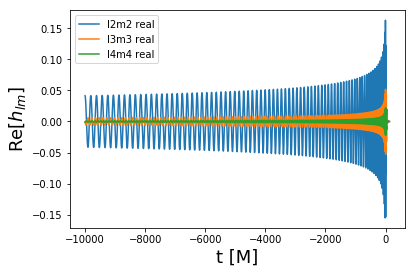

In [8]:
q = 7
chiA = [0, 0, 0.5]
chiB = [0, 0, -0.7]
f_low = 0  # this will be ignored and the wavefrom will be returned on the times given below
times = np.arange(-10000,130,0.1)
# The returned times are the same as the input times
times, h, dyn = sur(q, chiA, chiB, times=times, f_low=f_low)

P.plot(times, h[(2,2)].real, label='l2m2 real')
P.plot(times, h[(3,3)].real, label='l3m3 real')
P.plot(times, h[(4,4)].real, label='l4m4 real')
P.ylabel('Re[$h_{lm}$]', fontsize=18)
P.xlabel('t [M]', fontsize=18)
P.legend()

### Evaluate waveform modes in physical units

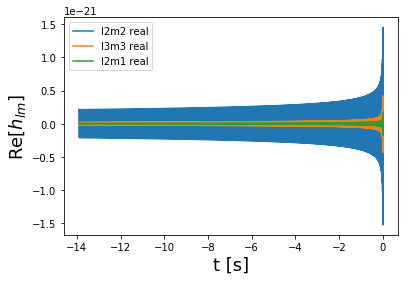

In [9]:
q = 7
chiA = [0, 0, 0.5]
chiB = [0, 0, -0.7]
M = 20             # Total masss in solar masses
dist_mpc = 100     # distance in megaparsecs
dt = 1./4096       # step size in seconds
f_low = 20         # initial frequency in Hz
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, mode_list=[(2,2), (2,1), (3, 3)], M=M, dist_mpc=dist_mpc, units='mks')

P.plot(t, h[(2,2)].real, label='l2m2 real')
P.plot(t, h[(3,3)].real, label='l3m3 real')
P.plot(t, h[(2,1)].real, label='l2m1 real')
P.ylabel('Re[$h_{lm}$]', fontsize=18)
P.xlabel('t [s]', fontsize=18)
P.legend()

### Evaluate waveform at a point on the sky

Text(0.5,0,'t [s]')

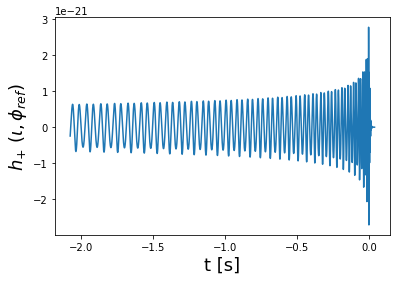

In [10]:
q = 7
chiA = [0, 0, 0.5]
chiB = [0, 0, -0.7]
M = 60             # Total masss in solar masses
dist_mpc = 100     # distance in megaparsecs
dt = 1./4096       # step size in seconds
f_low = 20         # initial frequency in Hz
inclination = np.pi/4
phi_ref = np.pi/5

# Will only include modes given in mode_list argument as well as the m<0 counterparts.
# If mode_list is not specified, uses all available modes.
# Returns h_+ -i h_x
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, mode_list=[(2,2), (2,1), (3, 3)], M=M, dist_mpc=dist_mpc, 
           inclination=inclination, phi_ref=phi_ref, units='mks')

P.plot(t, h.real)
P.ylabel('$h_{+}$ $(\iota, \phi_{ref})$', fontsize=18)
P.xlabel('t [s]', fontsize=18)